# Happiness Score

In [113]:
# impoerting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [97]:
#Importing datasets
dataset = pd.read_csv("F:\\Data Science\\FlipRobo\\Project 3 & 4\\happiness_score_dataset.csv")

In [99]:
dataset

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [62]:
#info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [63]:
#To know amount of rows and columns
dataset.shape

(158, 12)

In [64]:
#null values
dataset.isnull()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
153,False,False,False,False,False,False,False,False,False,False,False,False
154,False,False,False,False,False,False,False,False,False,False,False,False
155,False,False,False,False,False,False,False,False,False,False,False,False
156,False,False,False,False,False,False,False,False,False,False,False,False


In [84]:
columns = ['Country', 'Region', 'Happiness Rank','Happiness Score' ,'Standard Error','Economy (GDP per Capita)','Family','Health (Life Expectancy)', 'Freedom','Trust (Government Corruption)' ,'Generosity', 'Dystopia Residual']
dataset = dataset[columns].copy()
dataset.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [108]:
#vizualizations
#statistical measures
numerical_columns = ['Happiness Score' ,'Standard Error','Economy (GDP per Capita)','Family','Health (Life Expectancy)', 'Freedom','Trust (Government Corruption)' ,'Generosity', 'Dystopia Residual']
dataset[numerical_columns].describe()


,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


1. count gives no. of rows in each column.
   
   Other Measures of Dispersion:
2. Mean gives average of the data. 
3. std means standard deviation- it depicts how data is spread and if data could have Outliers or not
4. min gives minimum records in the data set and max gives maximum record.
5. Quartile- median divides the data into half so that 50%(second Quartile) of the measurement lies below the median and 50% lies above it, the quartile breaks down the data into quarters so that 25%(First Quartile) of the measurements are less than the lower quartile, 50% are less than the median, and 75%(Third Quartile) are less than the upper quartile.


Observations:
    1.

<AxesSubplot:>

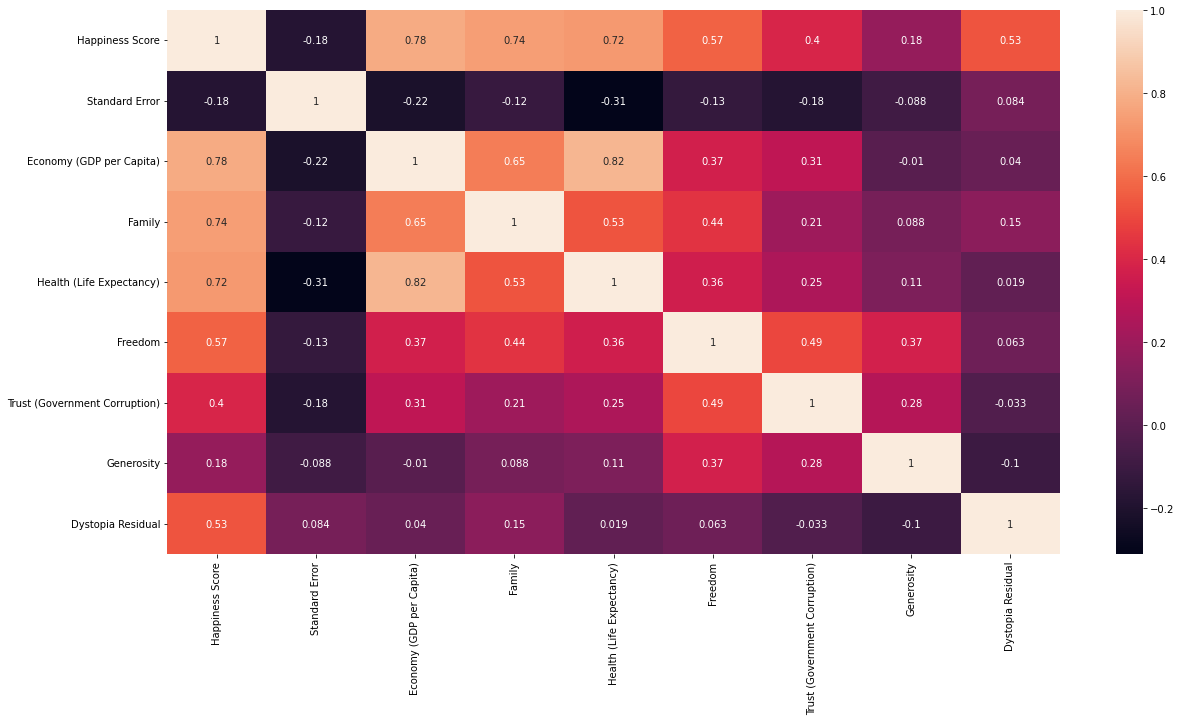

In [102]:
plt.figure(figsize = [20,10])
sns.heatmap(dataset[numerical_columns].corr(), annot = True)

In [103]:
correlation=dataset[numerical_columns].corr()
correlation

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Score,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


In [104]:
abs(correlation['Happiness Score'].sort_values(ascending=False))

Happiness Score                  1.000000
Economy (GDP per Capita)         0.780966
Family                           0.740605
Health (Life Expectancy)         0.724200
Freedom                          0.568211
Dystopia Residual                0.530474
Trust (Government Corruption)    0.395199
Generosity                       0.180319
Standard Error                   0.177254
Name: Happiness Score, dtype: float64

Observations:
1. Economy(GDP per Capita), Healthy Life Expectancy and Family are highly correlated with Happiness Score.
2. Freedom to Make Life choices also has a significant correlation to Happiness Scores.
3. Healthy Life Expectancy and family are highly correlated with  Economy(GDP per Capita) .

Correlation does not mean causation but these features may contribute better than the other factors. This can also give us an idea of which features to drop when we run the regression analysis on this data.

In [89]:
dataset['Happiness Score'].min()

2.839

In [90]:
dataset['Happiness Score'].mean()

5.3757341772151905

In [93]:
dataset['Happiness Score'].max()

7.587

The highest happiness score in belongs to Switzerland with a score of 7.8

In [52]:
dataset.loc[0]

Country                             Switzerland
Region                           Western Europe
Happiness Rank                                1
Happiness Score                           7.587
Standard Error                          0.03411
Economy (GDP per Capita)                1.39651
Family                                  1.34951
Health (Life Expectancy)                0.94143
Freedom                                 0.66557
Trust (Government Corruption)           0.41978
Generosity                              0.29678
Dystopia Residual                       2.51738
Name: 0, dtype: object

**The distribution of numerical data using both histograms and boxplots.**

In [117]:
# Create a function that displays the distribution of numerical data using both histograms and boxplots.
def show_distribution(var):
    var_min = dataset[var].min()
    var_mean = dataset[var].mean()
    var_median = dataset[var].median()
    var_mode = dataset[var].mode()[0]
    var_max = dataset[var].max()
    
    # Histogram 
    fig, ax = plt.subplots(2, 1, figsize = (8,8))
    sns.histplot(dataset, x = var, kde = True, color = 'red', alpha = 0.2, ax = ax[0])
    ax[0].set_ylabel("Frequency")
    
    ax[0].axvline(x = var_min, color = 'gray', linewidth = 2, linestyle = "--")
    ax[0].axvline(x = var_mean, color = 'blue', linewidth = 2, linestyle = "--")
    ax[0].axvline(x = var_median, color = 'brown', linewidth = 2, linestyle = "--")
    ax[0].axvline(x = var_mode, color = 'cyan', linewidth = 2, linestyle = "--")
    ax[0].axvline(x = var_max, color = 'gray', linewidth = 2, linestyle = "--")
    
   

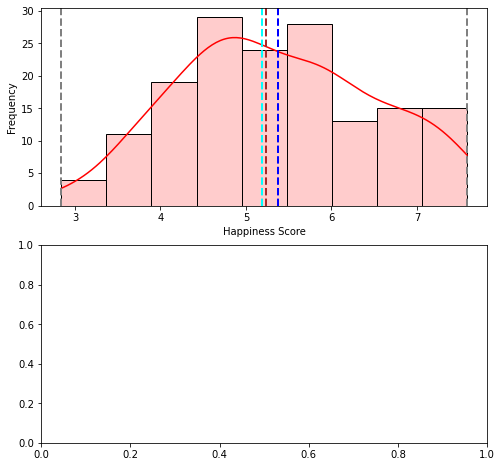

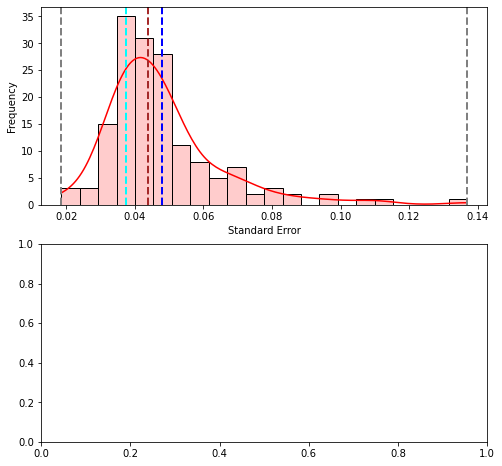

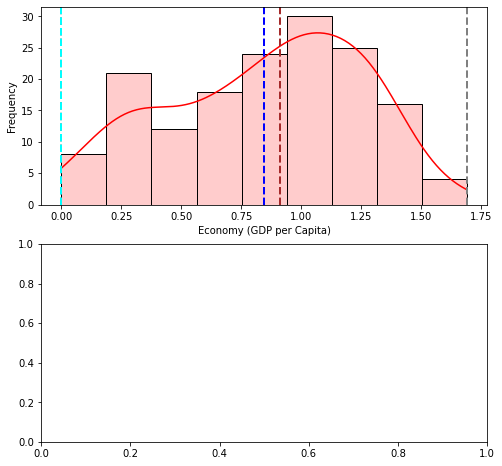

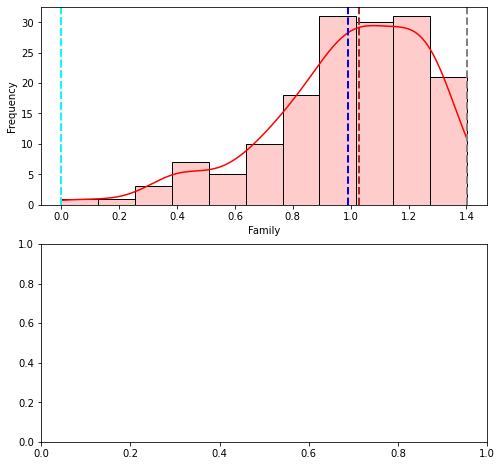

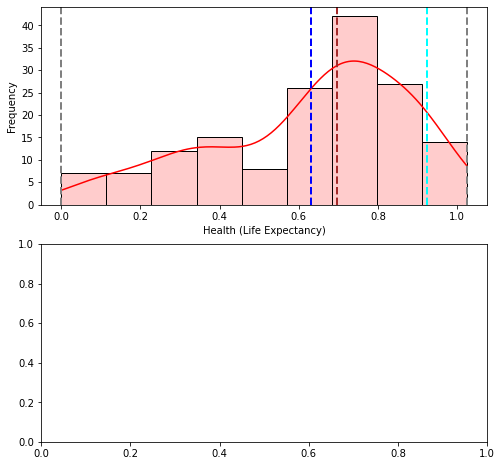

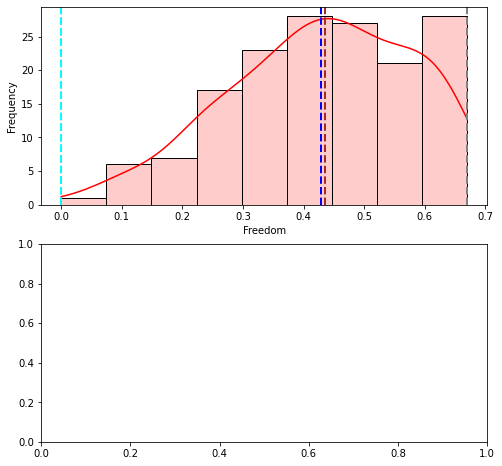

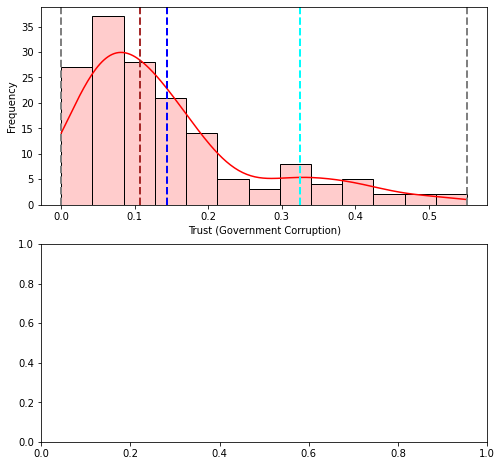

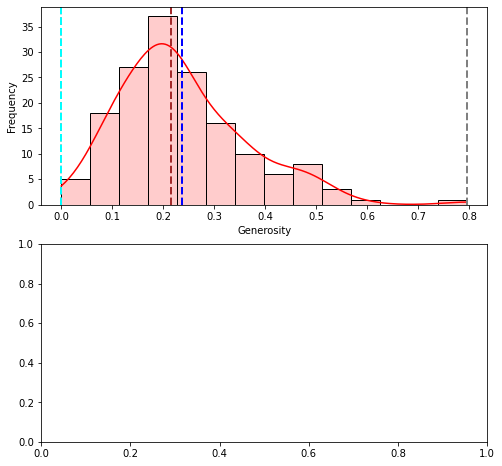

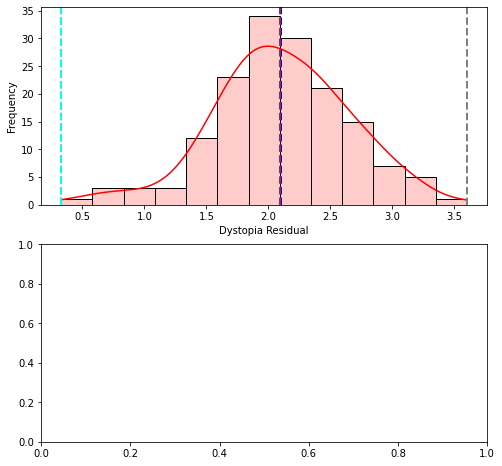

In [118]:
# Call show_distribution function
for column in numerical_columns:
    show_distribution(column)

**Model Prediction and Evaluation**

In [119]:
#imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
sns.set_theme(font_scale=1,palette='colorblind')

**Regression Analysis Task**

The goal is to predict the happiness score given the other features in the dataset.

The dataset has columns Country Name, Regional Indicator, Happiness Scores, Social Support, Healthy Life Expectancy, Freedom to Make Life Choices, Generosity and Perceptions of Corruption. The desired target we are trying to predict is Happiness Scores.

Since Happiness Score is a quantity, it is a continuous target. Regression is supervised machine learning for a continuous target so that is why I am choosing to use fit a regression model in order to predict the Happiness Score of countries in Africa.

In [124]:
# defining the target variable vs other features that contribute
feature_vars = dataset
target_var = dataset['Happiness Score']

In [125]:
# dropping irrelevant features
feature_vars = feature_vars.drop('Happiness Score', axis = 1)
feature_vars = feature_vars.drop('Country', axis = 1)
feature_vars = feature_vars.drop('Region', axis = 1)

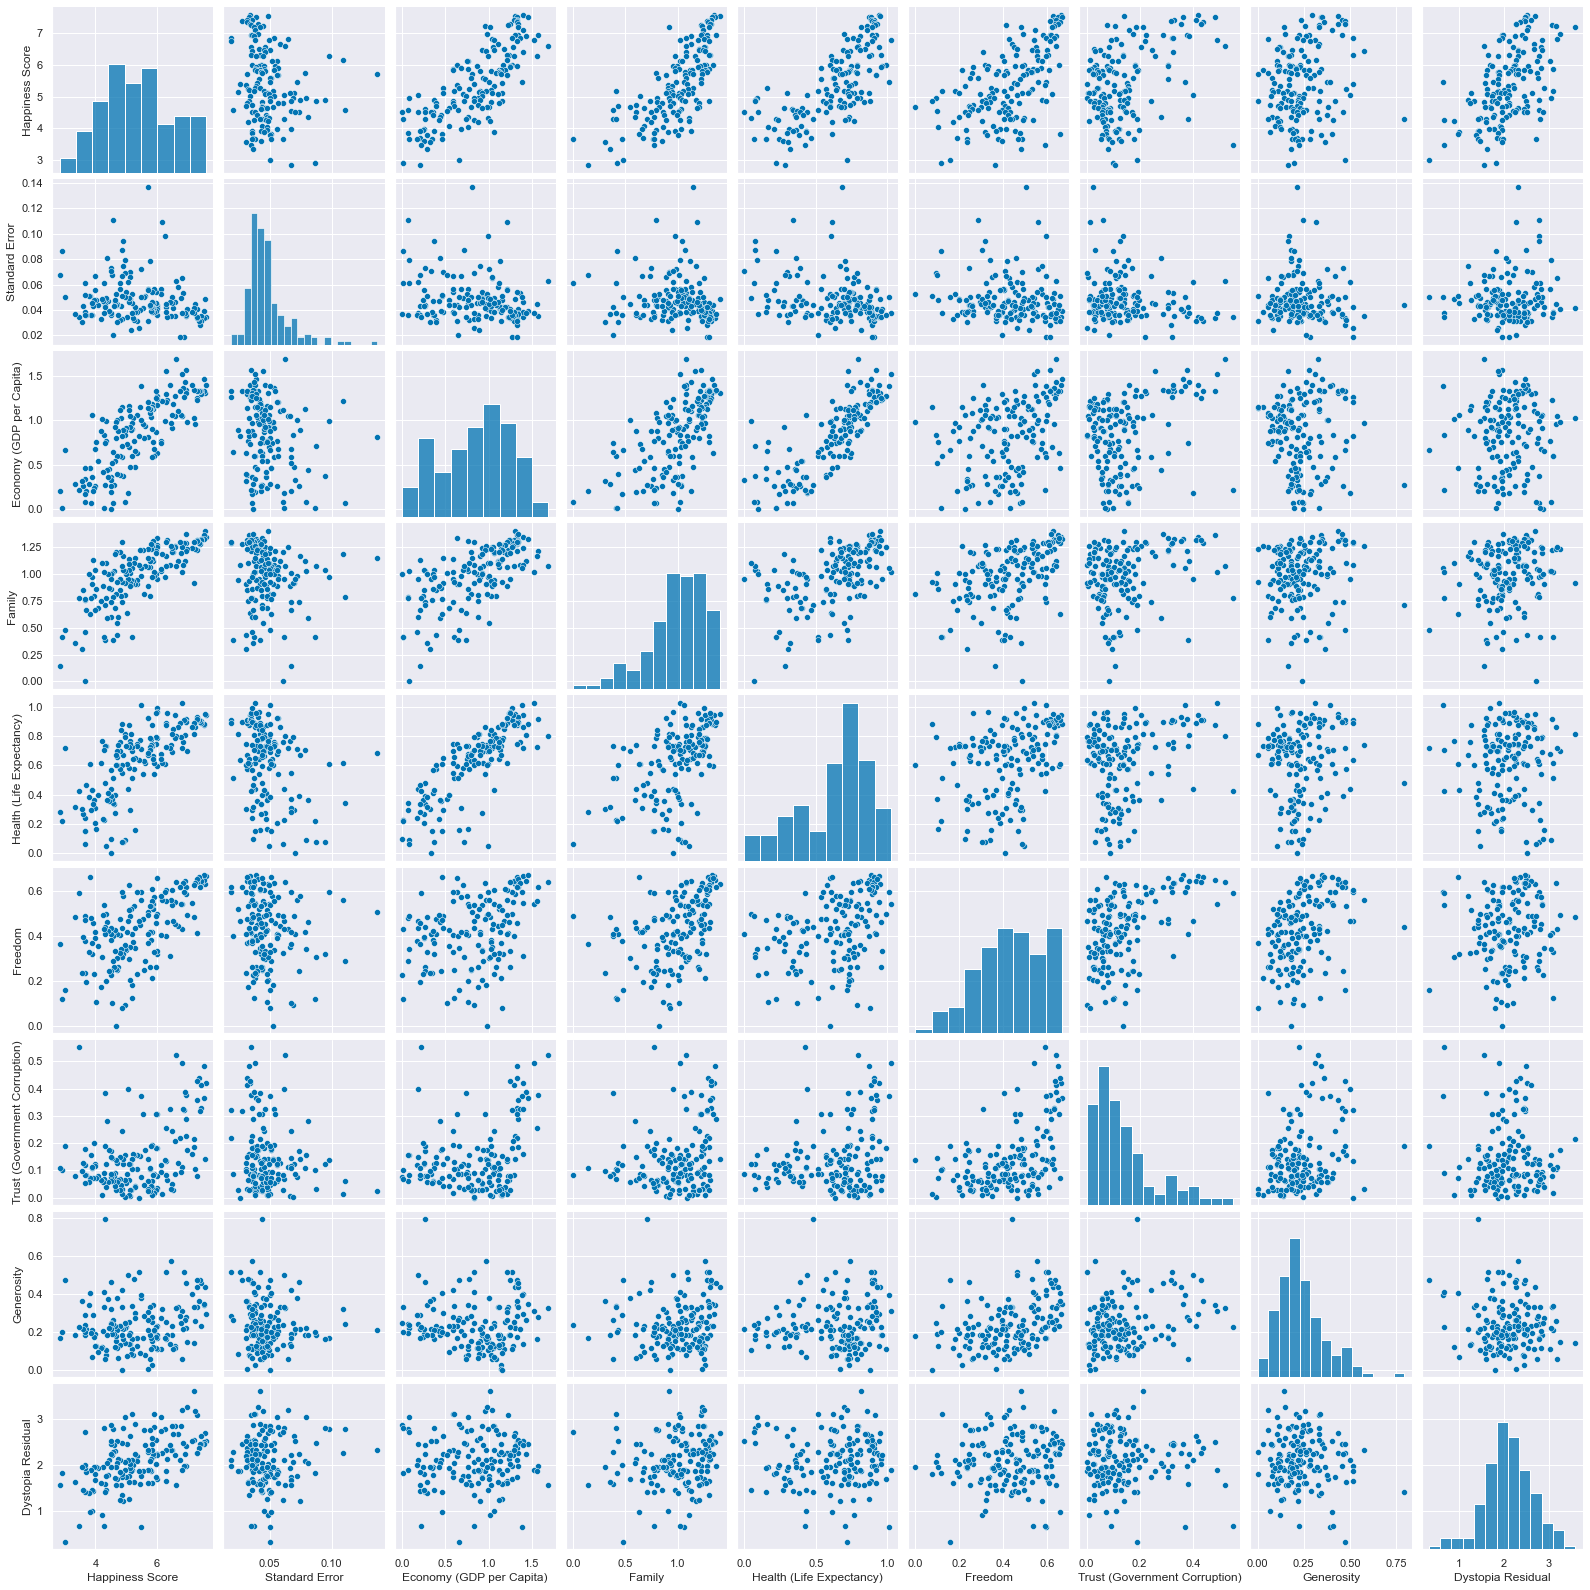

In [126]:
sns.pairplot(dataset[numerical_columns])

**Fitting the Model**

In [127]:
X_train,X_test, y_train,y_test = train_test_split(feature_vars, target_var, train_size=.75)

lm = linear_model.LinearRegression()

lm.fit(X_train,y_train)

LinearRegression()

In [129]:
y_pred = lm.predict(X_test)

In [130]:
r2_score(y_test, y_pred)

0.9999998596914785

In [131]:
lm.coef_, lm.intercept_

(array([-5.47397403e-06, -1.03136310e-03,  9.99856692e-01,  9.99814818e-01,
         9.99525955e-01,  9.99430621e-01,  9.99622526e-01,  9.99928703e-01,
         9.99878841e-01]),
 0.0016366175787068116)

In [132]:
feature_vars.columns

Index(['Happiness Rank', 'Standard Error', 'Economy (GDP per Capita)',
       'Family', 'Health (Life Expectancy)', 'Freedom',
       'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'],
      dtype='object')

The linear model is:

Happiness Score = 3.199Social Support + 0.053Healthy Life Expectancy + 1.695Freedom to Make Life Choices +0.199Generosity — 1.179*Perceptions of Corruption — 1.024.